In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob



In [2]:
import numpy as np # linear algebra
import pandas as pd
import os



In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [4]:
train_data_dir = r'C:\Users\abirr\Desktop\New folder (2)\updatedataset'
img_width, img_height = 80, 80
batch_size = 32
validation_dir = r'C:\Users\abirr\Desktop\New folder (2)\updatedataset'


In [5]:
pip install Keras-Applications

Note: you may need to restart the kernel to use updated packages.


In [6]:
image_size = 80

#from keras.applications import preprocess_input
#model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights="imagenet")
data_generator = ImageDataGenerator(
                                    horizontal_flip=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    validation_split=0.2)# set validation split

train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=200,
    class_mode='categorical',
    subset='training'
    )
validation_generator = data_generator.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    batch_size=10,
    class_mode='categorical',
    subset='validation'
    )

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [20]:
test_dir = r'C:\Users\abirr\Desktop\New folder (2)\updatedataset\test'

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

In [28]:
IMAGE_SIZE = [80, 80]

In [29]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 20, shuffle=False, class_mode='categorical', subset='validation')

Found 5094 images belonging to 2 classes.


In [7]:
# Hyperparameters

from tensorflow.keras.optimizers import Adam, SGD
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Do not train first layer (ResNet) as it is already pre-trained
model.layers[0].trainable = False

# Compile model
from tensorflow.python.keras import optimizers


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10


In [9]:
import math

fit_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1)
       

Epoch 1/10
339/339 [==============================] - 3192s 9s/step - loss: 0.5304 - accuracy: 0.7960 - val_loss: 0.5222 - val_accuracy: 0.7999
Epoch 2/10
339/339 [==============================] - 2399s 7s/step - loss: 0.5115 - accuracy: 0.8000 - val_loss: 0.5057 - val_accuracy: 0.8000
Epoch 3/10
339/339 [==============================] - 2535s 7s/step - loss: 0.5070 - accuracy: 0.7999 - val_loss: 0.5041 - val_accuracy: 0.8001
Epoch 4/10
339/339 [==============================] - 2502s 7s/step - loss: 0.5057 - accuracy: 0.8001 - val_loss: 0.5049 - val_accuracy: 0.8002
Epoch 5/10
339/339 [==============================] - 2455s 7s/step - loss: 0.5042 - accuracy: 0.8000 - val_loss: 0.5018 - val_accuracy: 0.8000
Epoch 6/10
339/339 [==============================] - 12126s 36s/step - loss: 0.5025 - accuracy: 0.8000 - val_loss: 0.5023 - val_accuracy: 0.8000
Epoch 7/10
339/339 [==============================] - 2510s 7s/step - loss: 0.5017 - accuracy: 0.8001 - val_loss: 0.5016 - val_accurac

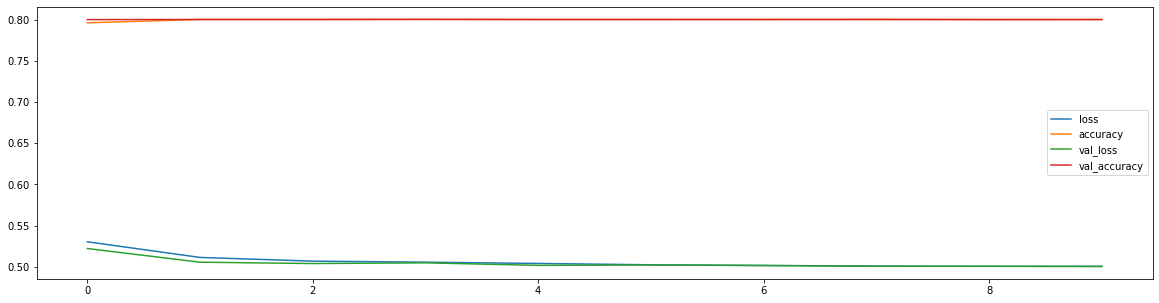

In [10]:
pd.DataFrame(fit_history.history).plot(figsize=(20,5))
plt.show()

In [13]:
import tensorflow as tf

In [18]:
def get_config(self):

        config = super().get_config().copy()
        config.update({
            'vocab_size': self.vocab_size,
            'num_layers': self.num_layers,
            'units': self.units,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dropout': self.dropout,
        })
        return config

In [30]:
scores = model.evaluate(test_generator)
print(" Test Accuracy = ", scores[1])

255/255 [==============================] - 188s 735ms/step - loss: 0.9010 - accuracy: 0.5059
 Test Accuracy =  0.5058892965316772


In [31]:
scores

[0.901008665561676, 0.5058892965316772]

In [35]:
acc_test, loss_test = model.evaluate_generator(test_generator)
print(acc_test)
print(loss_test)

0.901008665561676
0.5058892965316772


In [36]:
print(acc_test)
print(loss_test)

0.901008665561676
0.5058892965316772


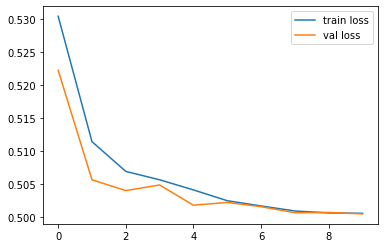

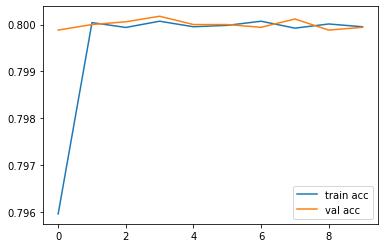

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(fit_history.history['loss'], label='train loss')
plt.plot(fit_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(fit_history.history['accuracy'], label='train acc')
plt.plot(fit_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import glob


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(80, 80))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
   
    clos =[]
for f in glob.glob(r'C:\Users\abirr\Desktop\New folder (2)\updatedataset\test\close\*.png') :
      
    # image path
    
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
           new_image = load_image(f)

    # check prediction
           pred = model.predict(new_image)
           clos.append(pred)   
        

In [39]:
import numpy as np
clos = np.array(clos)